Este notebook foi executado pelo Google Colaboratory. Para executá-lo, clone o repositório para um diretório em seu Google Drive, conecte o notebook com o drive `drive.mount('/content/drive')` e localize o repositório já clonado `%cd /content/drive/.../PAC/cnn`.

# Localizando repositório

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%cd /content/drive/MyDrive/Github/PAC/cnn

/content/drive/MyDrive/Github/PAC/cnn


# Treinamento

In [2]:
import data
import aimodel
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.color import label2rgb
plt.style.use('ggplot')

In [3]:
dataset = (x_train, y_train), (x_test, y_test) = data.load_dataset(as_tensor=True)

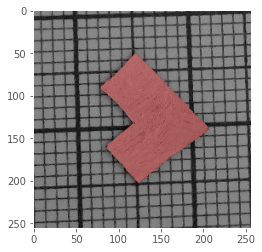

In [4]:
i = np.random.randint(len(x_train))
plt.imshow(label2rgb(y_train[i, :, :, 0], x_train[i, :, :, 0], bg_label=0))
plt.grid(False)
plt.show()

In [6]:
unet = aimodel.build_UNet((256, 256, 1), (16, 32, 64), name='U-Net_test')
unet.compile(optimizer=tf.keras.optimizers.Adam(1e-3, decay=1e-3/150), loss='binary_crossentropy')

In [7]:
plot_callback = aimodel.UNetTrainingPlot(unet, dataset)
save_callback = aimodel.UNetCheckpoint(unet)

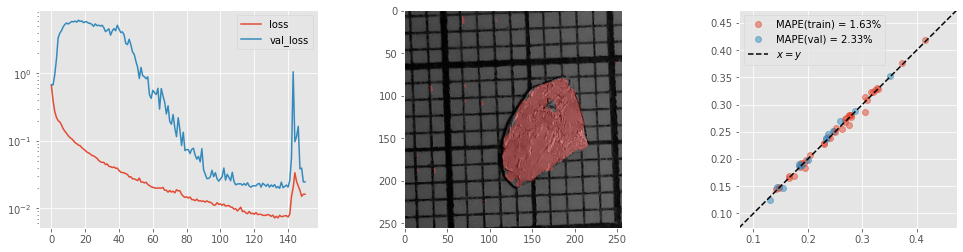

In [8]:
history = unet.fit(
    x=x_train,
    y=y_train,
    epochs=150,
    batch_size=len(x_train)//6,
    validation_data=(x_test, y_test),
    callbacks=[plot_callback, save_callback]
)

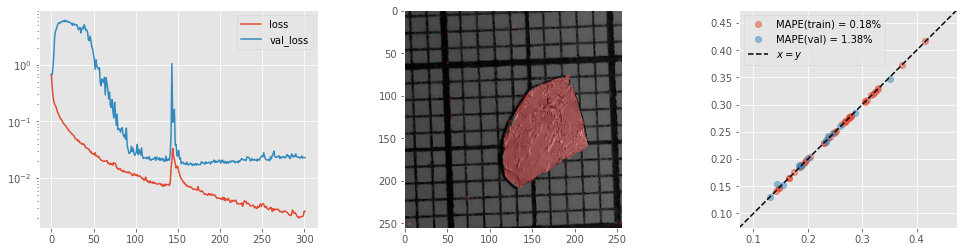

In [15]:
history = unet.fit(
    x=x_train,
    y=y_train,
    epochs=150,
    batch_size=len(x_train)//6,
    validation_data=(x_test, y_test),
    callbacks=[plot_callback, save_callback]
)

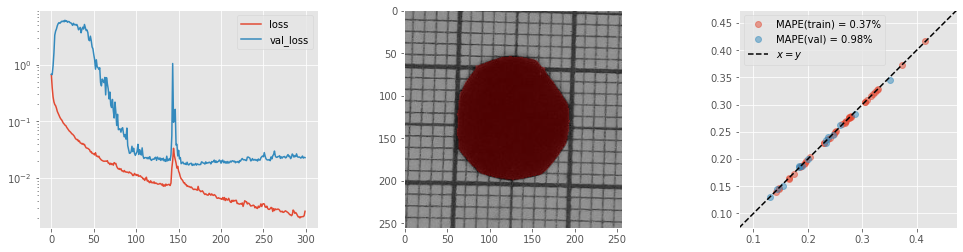

In [16]:
aimodel.UNetTrainingPlot(aimodel.load_unet('U-Net_test'), dataset).plot()